In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from yellowbrick.model_selection import FeatureImportances
import scikitplot as skplt
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import time

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

The red wine dataset
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

The white wine dataset
https://www.kaggle.com/datasets/piyushagni5/white-wine-quality

In [4]:
white_wine = pd.read_csv("winequality-white.csv")
red_wine = pd.read_csv("winequality-red.csv")

Looking at the numbers and seeing if there are any obvious outliers and if there is some necessary pruning and cleaning to be done

In [29]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [30]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


There are some outliers but not some egregious ones or ones that may have a big influence on the data. The only one that I thought would be a good idea to clean was the outliers in residual sugar but as I will be removing residual sugar from both datasets, that will be unnecessary

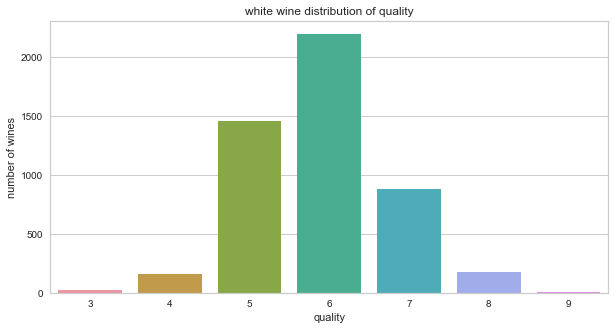

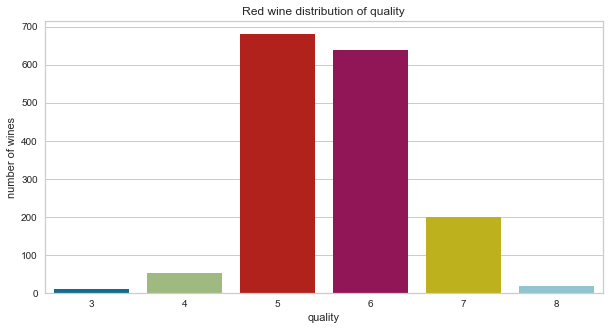

In [31]:
temp = white_wine["quality"].value_counts()
df = pd.DataFrame({'quality': temp.index,
                   'number of wines': temp.values
                  })
plt.figure(figsize=(10,5))
plt.title("white wine distribution of quality")
sns.barplot(x = 'quality', y="number of wines", data=df)
plt.show()

temp = red_wine["quality"].value_counts()
df = pd.DataFrame({'quality': temp.index,
                   'number of wines': temp.values
                  })
plt.figure(figsize=(10,5))
plt.title("Red wine distribution of quality")
sns.barplot(x = 'quality', y="number of wines", data=df)
plt.show()


The distribution of the quality of both wines gives the picture that the dataset will be really similar to each other
There is a bit more distribution in the white wine dataset which can mean more variety

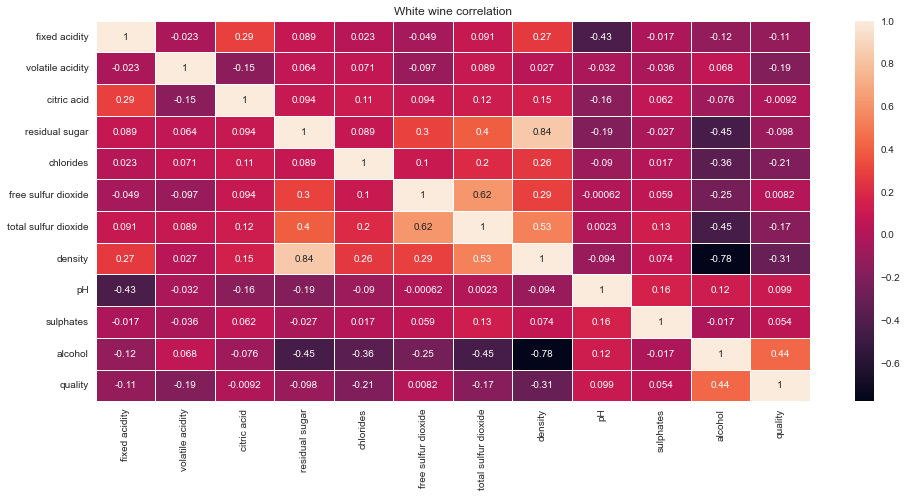

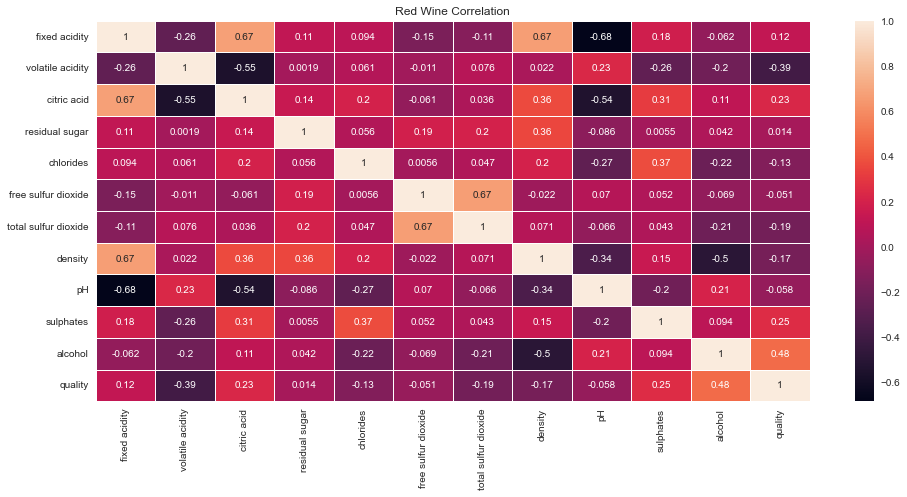

In [32]:
plt.figure(figsize=(16, 7))

# Finding the correlation between the columns in the dataset
plt.title('White wine correlation')
sns.heatmap(white_wine.corr(), annot=True, fmt='0.2g', linewidths=1)
plt.show()

plt.figure(figsize=(16, 7))
plt.title('Red Wine Correlation')
sns.heatmap(red_wine.corr(), annot=True, fmt='0.2g', linewidths=1)

plt.show()

What can be noted on the correlation heat map for white wine is this:
<ul>
        <li>
            Residual sugar has very high positive correlation with the density of the wine, which has a non-trivial negative correlation on quality, as is reflected in the negative correlation with residual sugar directly.
        </li>
        <li>
            alcohol, in addition to having the highest positive correlation with quality, it also has a very high negative correlation with density, whose negative correlation with quality is relatively high.
        </li>
    </ul>

What can be noted on the correlation heat map for red wine is this:
<ul>
    <li>
        Residual sugar has very high positive correlation with the density of the wine, which has a non-trivial negative correlation on quality, as is reflected in the negative correlation with residual sugar directly.
    </li>
    <li>
        There are some high negative correlations where pH and acidity is concerned in most cases, except for in the case of volitile acitidy, in which case it has a non-trivial positive correlation.
    </li>
</ul>

In [33]:
grid_dict = {}
acc_dict = {}
time_dict = {}

Cleaning and pruning the data
Dropping residual sugar as the correlation between density and residual sugar is really high and density is more important

While most correlations are fairly weak, where both wines are concerned there are a couple of things here can be noted:
    <ul>
        <li>
            total sulfure dioxide and free sulfur dioxide have a clear positive correlation but that's to be expected since one is a subset of the other
        </li>
        <li>
            where quality is concerned it is evident that while there are some positive correlations, it is evident that the variable that has the highest positive correlation with quality is alchol
        </li>
    </ul>

In [5]:
# Dropping total sulfur dioxide for white
#white_wine = white_wine.drop('total sulfur dioxide', axis=1)
white_wine = white_wine.drop('residual sugar', axis=1)
# Dropping free sulfur dioxide for red
red_wine = red_wine.drop('residual sugar', axis=1)
#red_wine = red_wine.drop('total sulfur dioxide', axis=1)

red_wine["Wine"] = "RED"
white_wine["Wine"] = "WHITE"

wines = pd.merge(white_wine, red_wine, how='outer')
reg_wines = pd.merge(white_wine, red_wine, how='outer')
wines = wines.drop('Wine', axis=1)
y_wines = wines['quality']
X_wines = wines.drop('quality', axis=1)

red_wine = red_wine.drop('Wine', axis=1)
white_wine = white_wine.drop('Wine', axis=1)

# Assigning X to data and y to target
y_white = white_wine['quality']
X_white = white_wine.drop('quality', axis=1)
# Assigning X to data and y to target for red
y_red = red_wine['quality']
X_red = red_wine.drop('quality', axis=1)

Plotting the distribution of both white wine dataset and red wine dataset

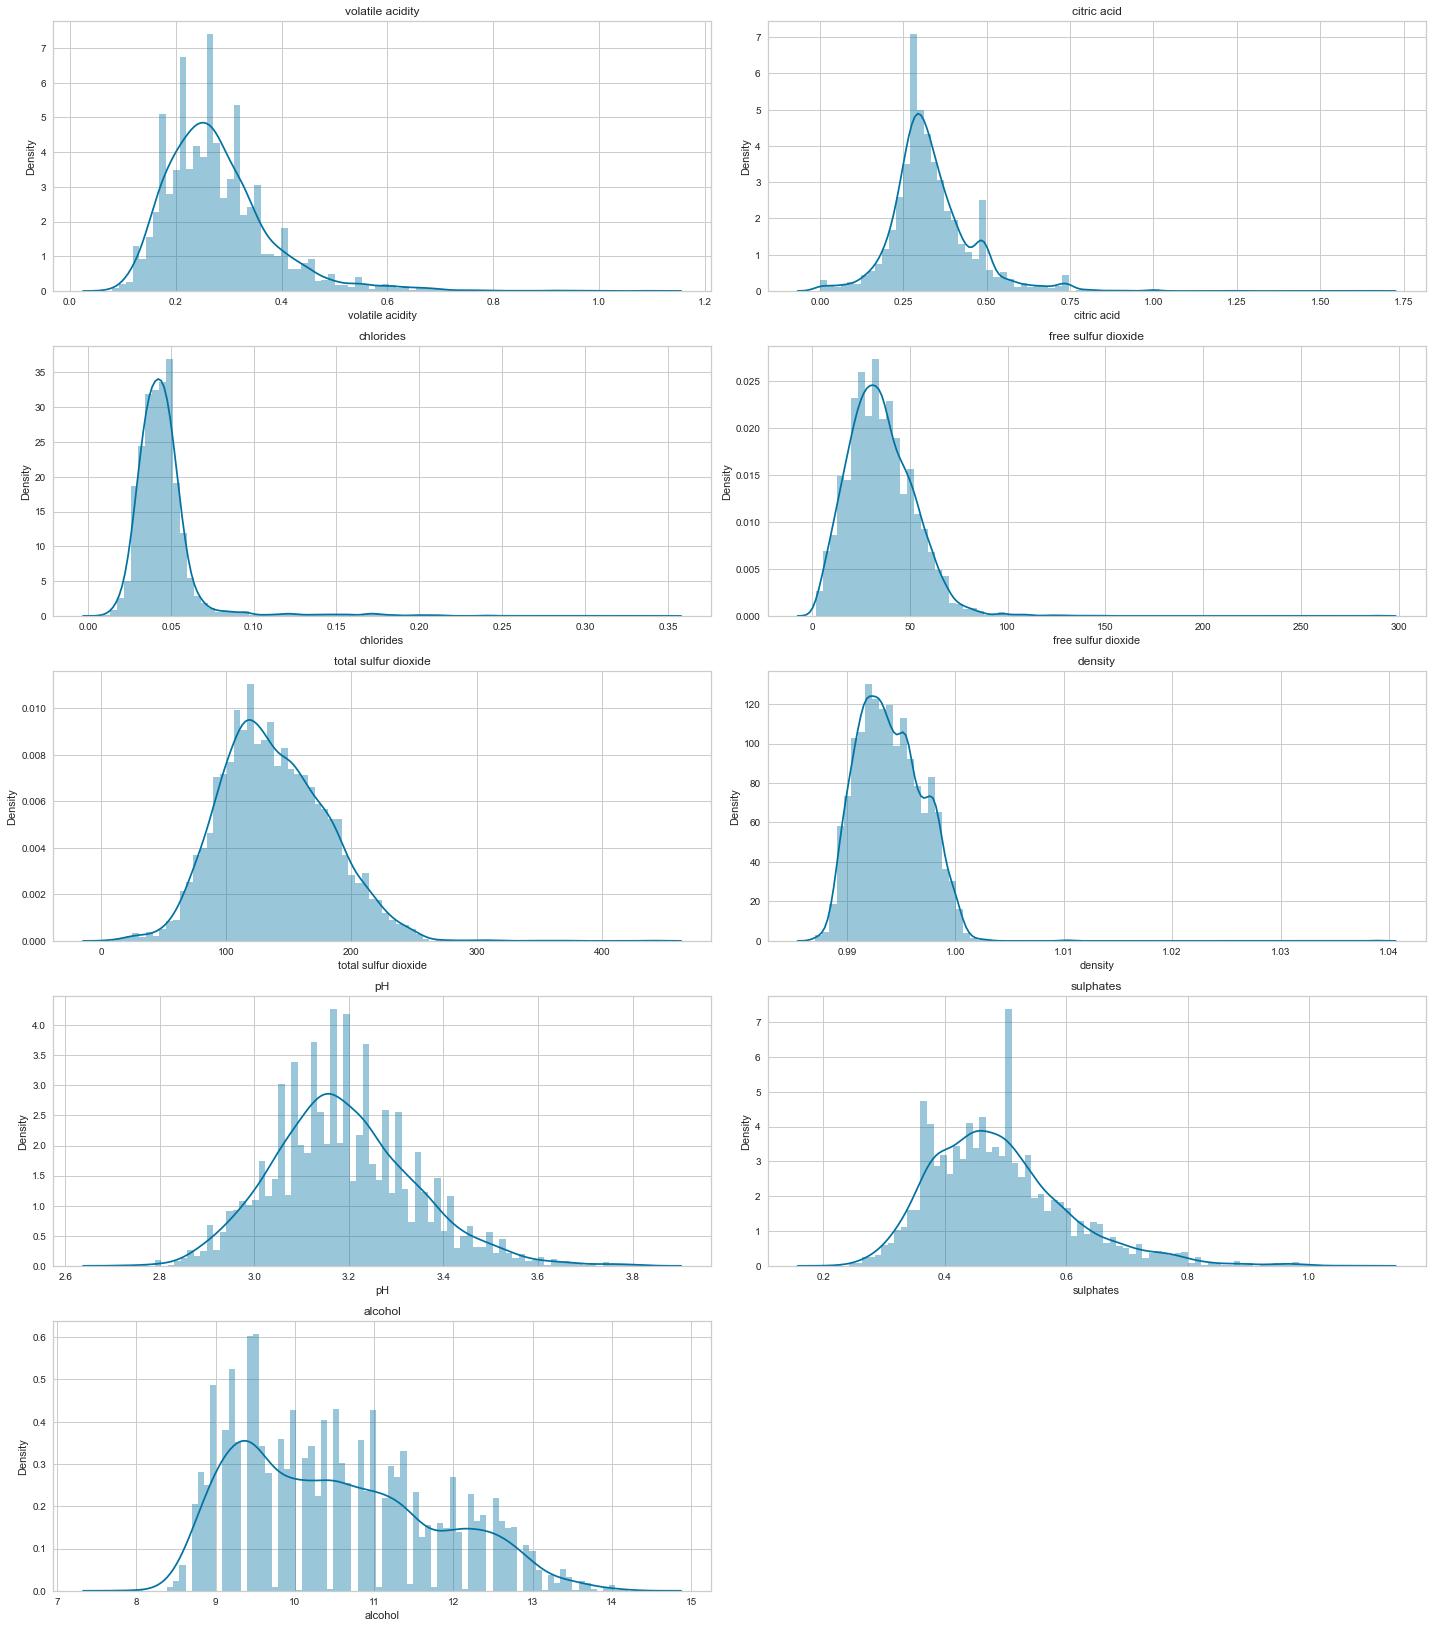

In [59]:
# White wine
cols = X_white.columns

fig = plt.figure(figsize=(20,90))



for i in range(1, len(cols)):
    ax = fig.add_subplot(20, 2, i)
    g = sns.distplot(X_white[cols[i]], bins=80)
    plt.title(cols[i])
fig.tight_layout()


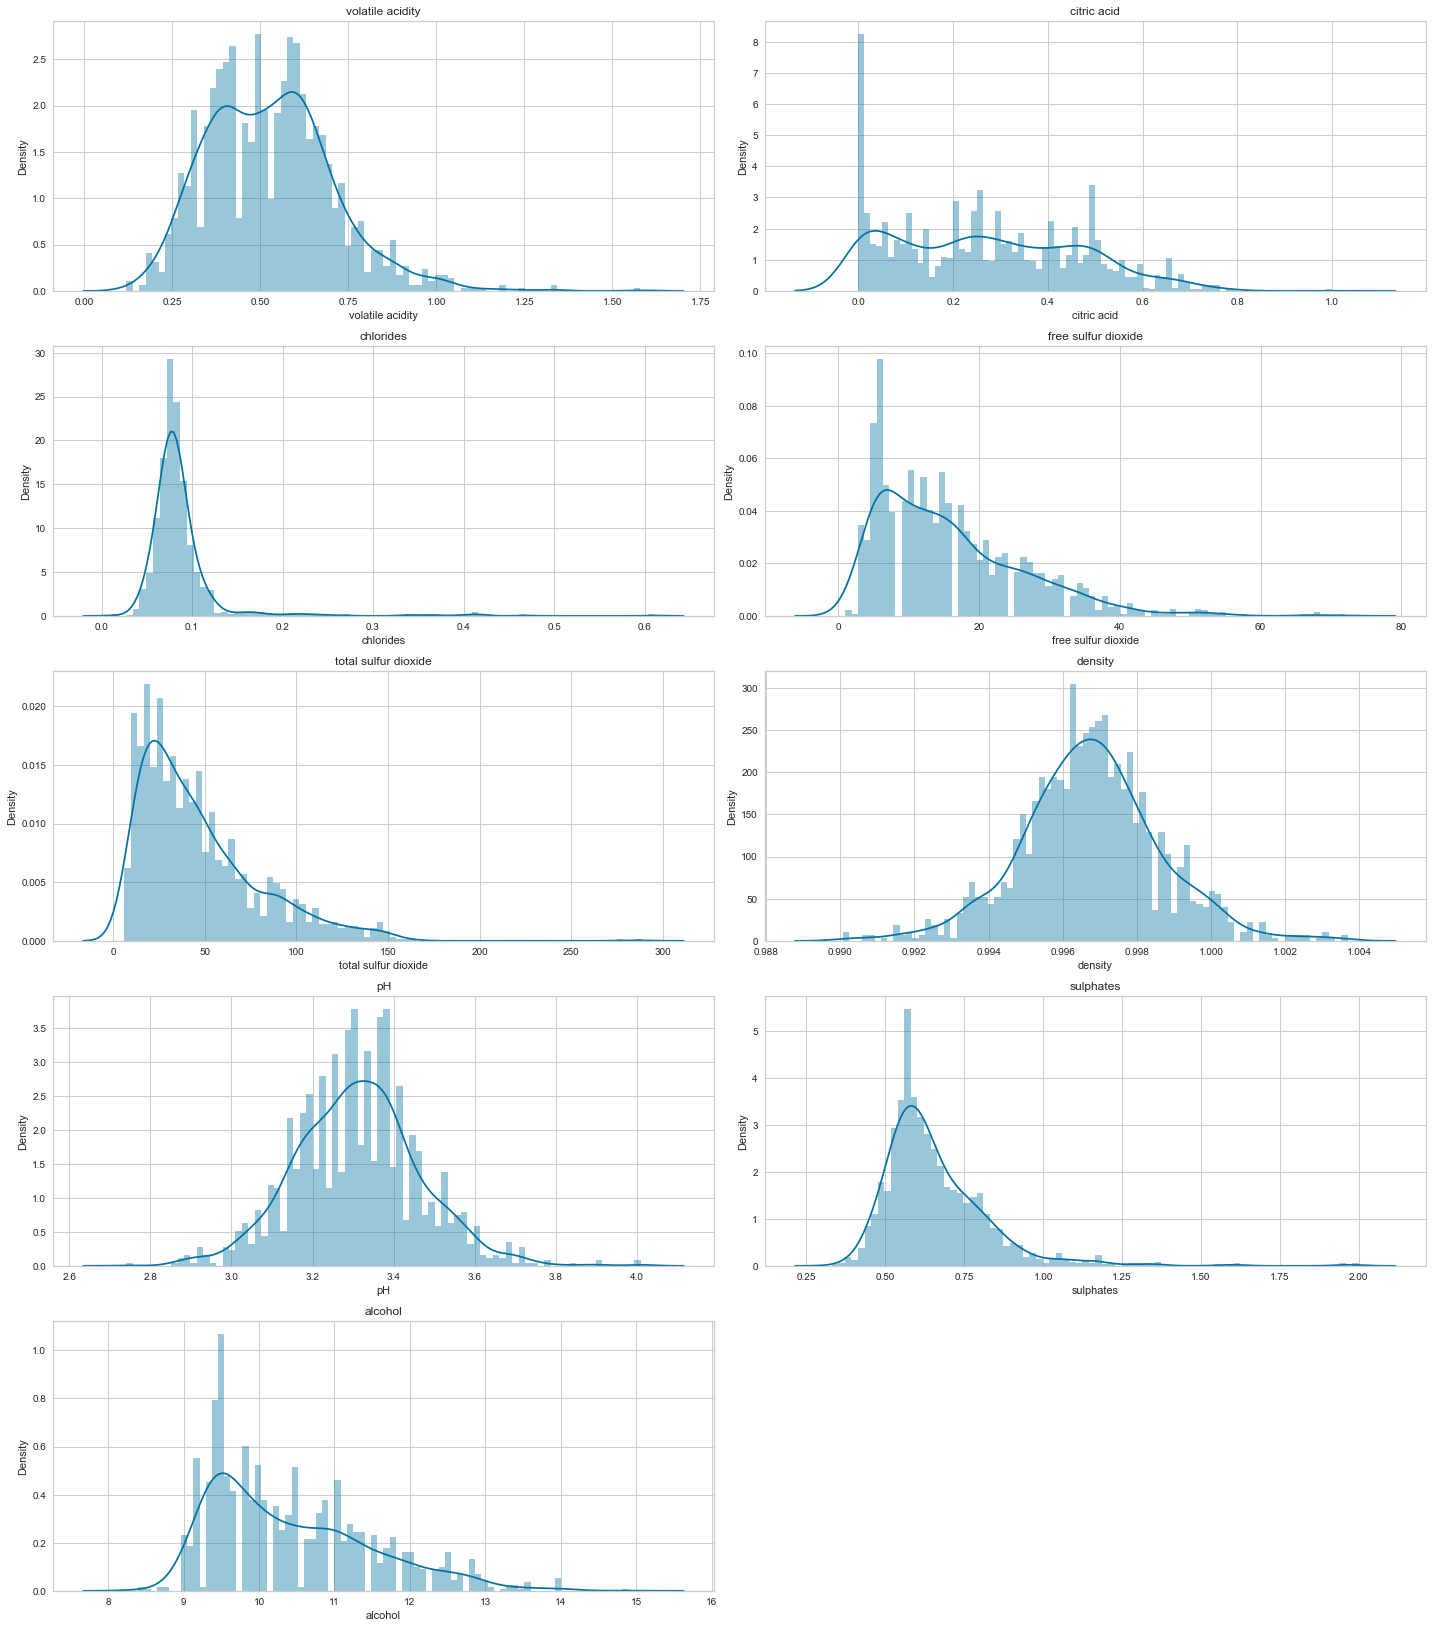

In [60]:
# Red wine
cols = X_red.columns

fig = plt.figure(figsize=(20,90))



for i in range(1, len(cols)):
    ax = fig.add_subplot(20, 2, i)
    g = sns.distplot(X_red[cols[i]], bins=80)
    plt.title(cols[i])
fig.tight_layout()

These plots show that there is really not that much variance in the data.

White wine:
The difference between highest and lowest data point in density category is 0.01
The difference between highest and lowest data point in chlorides category is 0.05

Red wine
While the data is better distributed it's still not the best and is still really close together

-----
Because of how small the variance in both datasets and they've both similar results will mean that the classifiers will probably struggle in classifying both datasets and regression will probably also struggle in splitting the data

Splitting the every dataset with the same parameters

In [6]:
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.25, stratify=y_white, random_state=42)

# Red
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.25, stratify=y_red, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_wines, y_wines, test_size=0.25, stratify=y_wines, random_state=42)

Normalizing the data to remove variance in the data and watch out so that a few data points don't dominate the classifiers. This is also just normal procedure when working with data and classifiers

In [38]:
# Normalizing the data
# White
std_white = StandardScaler()
X_train_white = std_white.fit_transform(X_train_white)
X_test_white = std_white.transform(X_test_white)

# Red
std_red = StandardScaler()
X_train_red = std_red.fit_transform(X_train_red)
X_test_red = std_red.transform(X_test_red)

After having normalized, cleaned and a bit pruned the data it's now time to see which classifier is the best. GridSearchCV will be used to optimise the search for the best parameters for every classifier. There will also be taking a few measurements to find the best classifier such as how long the calculations take, accuracy both before and after having found the best parameters.

In [39]:
# K Nearest Neighbour Classifier
start_time_white = time.time()
knn_white = KNeighborsClassifier()
knn_white.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
knn_acc1_white = accuracy_score(y_test_white, knn_white.predict(X_test_white))
# Parameters for GridSearchCV
param_grid = {'n_neighbors': [20, 30, 25, 40, 50, 100],
			  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
			  'weights': ['uniform', 'distance']
			  }

grid = GridSearchCV(knn_white, param_grid, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_white, y_train_white)
grid_predictions = grid.predict(X_test_white)
knn2_white = KNeighborsClassifier(n_neighbors=grid.best_estimator_.n_neighbors, algorithm=grid.best_estimator_.algorithm,
							weights=grid.best_estimator_.weights)
knn2_white.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
knn_acc2_white = accuracy_score(y_test_white, knn2_white.predict(X_test_white))
grid_dict["knn_acc_white"] = grid.best_params_
# Inserting both accuracy scores for comparison
acc_dict["KNN_white"] = [knn_acc1_white, knn_acc2_white]
end_time_white = time.time() - start_time_white
time_dict["KNN_white"] = end_time_white

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [40]:
# K Nearest Neighbour Classifier
start_time_red = time.time()
knn_red = KNeighborsClassifier()
knn_red.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
knn_acc1_red = accuracy_score(y_test_red, knn_red.predict(X_test_red))
# Parameters for GridSearchCV
param_grid = {'n_neighbors': [20, 30, 25, 40, 50, 100],
			  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
			  'weights': ['uniform', 'distance']
			  }

grid = GridSearchCV(knn_red, param_grid, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_red, y_train_red)
grid_predictions = grid.predict(X_test_red)
knn2_red = KNeighborsClassifier(n_neighbors=grid.best_estimator_.n_neighbors, algorithm=grid.best_estimator_.algorithm,
							weights=grid.best_estimator_.weights)
knn2_red.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
knn_acc2_red = accuracy_score(y_test_red, knn2_red.predict(X_test_red))
grid_dict["knn_acc_red"] = grid.best_params_
# Inserting both accuracy scores for comparison
acc_dict["KNN_red"] = [knn_acc1_red, knn_acc2_red]
end_time_red = time.time() - start_time_red
time_dict["KNN_red"] = end_time_red

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [41]:
# DecisionTree Classifier
start_time_white = time.time()
dt_white = DecisionTreeClassifier()
dt_white.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
dt_acc1_white = accuracy_score(y_test_white, dt_white.predict(X_test_white))
# Parameters for GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
			  'splitter': ['best', 'random'],
			  'max_depth': [4, 5, 7, 9, 10, 11, None, 100, 25, 50]}

grid = GridSearchCV(dt_white, param_grid, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_white, y_train_white)
grid_predictions = grid.predict(X_test_white)
dt2_white = DecisionTreeClassifier(criterion=grid.best_estimator_.criterion, splitter=grid.best_estimator_.splitter,
							 max_depth=grid.best_estimator_.max_depth)
dt2_white.fit(X_train_white, y_train_white)
# Accuracy for post GridSearchCV classifier
dt_acc2_white = accuracy_score(y_test_white, dt2_white.predict(X_test_white))
grid_dict["dtc_acc_white"] = grid.best_params_
# Inserting both accuracy scores for comparison
acc_dict["DT_white"] = [dt_acc1_white, dt_acc2_white]
end_time_white = time.time() - start_time_white
time_dict["DT_white"] = end_time_white

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [42]:
# DecisionTree Classifier
start_time_red = time.time()
dt_red = DecisionTreeClassifier()
dt_red.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
dt_acc1_red = accuracy_score(y_test_red, dt_red.predict(X_test_red))
# Parameters for GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
			  'splitter': ['best', 'random'],
			  'max_depth': [4, 5, 7, 9, 10, 11, None, 100, 25, 50]}

grid = GridSearchCV(dt_red, param_grid, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_red, y_train_red)
grid_predictions = grid.predict(X_test_red)
dt2_red = DecisionTreeClassifier(criterion=grid.best_estimator_.criterion, splitter=grid.best_estimator_.splitter,
							 max_depth=grid.best_estimator_.max_depth)
dt2_red.fit(X_train_red, y_train_red)
# Accuracy for post GridSearchCV classifier
dt_acc2_red = accuracy_score(y_test_red, dt2_red.predict(X_test_red))
grid_dict["dtc_acc_red"] = grid.best_params_
# Inserting both accuracy scores for comparison
acc_dict["DT_red"] = [dt_acc1_red, dt_acc2_red]
end_time_red = time.time() - start_time_red
time_dict["DT_red"] = end_time_red

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [43]:
start_time_white = time.time()
rf1_white = RandomForestClassifier()
rf1_white.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
rf_acc1_white = accuracy_score(y_test_white, rf1_white.predict(X_test_white))
# Parameters for GridSearchCV
param_grid = {'n_estimators': [70, 80, 100, 130, 150],
			  'criterion': ['gini', 'entropy'],
			  'max_depth': [4, 5, 7, 9, 10, 11, None, 100, 25, 50]}

grid = GridSearchCV(rf1_white, param_grid, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_white, y_train_white)
grid_predictions = grid.predict(X_test_white)
rf2_white = RandomForestClassifier(criterion=grid.best_estimator_.criterion, n_estimators=grid.best_estimator_.n_estimators,
							 max_depth=grid.best_estimator_.max_depth)
rf2_white.fit(X_train_white, y_train_white)
# Accuracy for post GridSearchCV classifier
rf_acc2_white = accuracy_score(y_test_white, rf2_white.predict(X_test_white))
grid_dict["rf_acc_white"] = grid.best_params_
# Inserting both accuaracy scores for comparison
acc_dict["RF_white"] = [rf_acc1_white, rf_acc2_white]
end_time_white = time.time() - start_time_white
time_dict["RF_white"] = end_time_white

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [44]:
start_time_red = time.time()
rf1_red = RandomForestClassifier()
rf1_red.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
rf_acc1_red = accuracy_score(y_test_red, rf1_red.predict(X_test_red))
# Parameters for GridSearchCV
param_grid = {'n_estimators': [70, 80, 100, 130, 150],
			  'criterion': ['gini', 'entropy'],
			  'max_depth': [4, 5, 7, 9, 10, 11, None, 100, 25, 50]}

grid = GridSearchCV(rf1_red, param_grid, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_red, y_train_red)
grid_predictions = grid.predict(X_test_red)
rf2_red = RandomForestClassifier(criterion=grid.best_estimator_.criterion, n_estimators=grid.best_estimator_.n_estimators,
							 max_depth=grid.best_estimator_.max_depth)
rf2_red.fit(X_train_red, y_train_red)
# Accuracy for post GridSearchCV classifier
rf_acc2_red = accuracy_score(y_test_red, rf2_red.predict(X_test_red))
grid_dict["rf_acc_red"] = grid.best_params_
# Inserting both accuaracy scores for comparison
acc_dict["RF_red"] = [rf_acc1_red, rf_acc2_red]
end_time_red = time.time() - start_time_red
time_dict["RF_red"] = end_time_red

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [45]:
# AdaBoost Classifier
start_time_white = time.time()
ada1_white = AdaBoostClassifier(base_estimator=rf2_white)
ada1_white.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
ada_acc1_white = accuracy_score(y_test_white, ada1_white.predict(X_test_white))
# Parameters for GridSearchCV
grid_param = {'n_estimators': [40, 50, 60, 65, 70, 80, 100],
			  'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
			  'algorithm': ['SAMME', 'SAMME.R']
			  }
grid = GridSearchCV(ada1_white, grid_param, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_white, y_train_white)
ada2_white = AdaBoostClassifier(base_estimator=rf2_white, n_estimators=grid.best_estimator_.n_estimators,
						  learning_rate=grid.best_estimator_.learning_rate, algorithm=grid.best_estimator_.algorithm)
ada2_white.fit(X_train_white, y_train_white)
# Accuracy for post GridSearchCV classifier
ada_acc2_white = accuracy_score(y_test_white, ada2_white.predict(X_test_white))
grid_dict["ada_acc"] = grid.best_params_
# Inserting both accuaracy scores for comparison
acc_dict["ADA"] = [ada_acc1_white, ada_acc2_white]
end_time_white = time.time() - start_time_white
time_dict["ADA_white"] = end_time_white

Fitting 10 folds for each of 84 candidates, totalling 840 fits


In [46]:
# AdaBoost Classifier
start_time_red = time.time()
ada1_red = AdaBoostClassifier(base_estimator=rf2_red)
ada1_red.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
ada_acc1_red = accuracy_score(y_test_red, ada1_red.predict(X_test_red))
# Parameters for GridSearchCV
grid_param = {'n_estimators': [50, 60, 65, 70, 80, 100, 140, 130, 120],
			  'learning_rate': [0.5, 0.6, 0.7, 0.8, 0.9, 1, 10],
			  'algorithm': ['SAMME', 'SAMME.R']
			  }
grid = GridSearchCV(ada1_red, grid_param, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_red, y_train_red)
ada2_red = AdaBoostClassifier(base_estimator=rf2_red, n_estimators=grid.best_estimator_.n_estimators,
						  learning_rate=grid.best_estimator_.learning_rate, algorithm=grid.best_estimator_.algorithm)
ada2_red.fit(X_train_red, y_train_red)
# Accuracy for post GridSearchCV classifier
ada_acc2_red = accuracy_score(y_test_red, ada2_red.predict(X_test_red))
grid_dict["ada_acc_red"] = grid.best_params_
# Inserting both accuaracy scores for comparison
acc_dict["ADA_red"] = [ada_acc1_red, ada_acc2_red]
end_time_red = time.time() - start_time_red
time_dict["ADA_red"] = end_time_red

Fitting 10 folds for each of 126 candidates, totalling 1260 fits


Printing the best parameters for every classifier to be able to optimise GridSearchCV more

In [47]:
print("-----------BEST HYPER-PARAMETERS-----------")
print(grid_dict)

print("-----------BEFORE AND AFTER ACCURACY-----------")
print(acc_dict)

-----------BEST HYPER-PARAMETERS-----------
{'knn_acc_white': {'algorithm': 'auto', 'n_neighbors': 30, 'weights': 'distance'}, 'knn_acc_red': {'algorithm': 'auto', 'n_neighbors': 100, 'weights': 'distance'}, 'dtc_acc_white': {'criterion': 'gini', 'max_depth': 25, 'splitter': 'best'}, 'dtc_acc_red': {'criterion': 'entropy', 'max_depth': 100, 'splitter': 'best'}, 'rf_acc_white': {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 130}, 'rf_acc_red': {'criterion': 'entropy', 'max_depth': 100, 'n_estimators': 150}, 'ada_acc': {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 80}, 'ada_acc_red': {'algorithm': 'SAMME.R', 'learning_rate': 0.9, 'n_estimators': 50}}
-----------BEFORE AND AFTER ACCURACY-----------
{'KNN_white': [0.5355102040816326, 0.6653061224489796], 'KNN_red': [0.5725, 0.66], 'DT_white': [0.6106122448979592, 0.6097959183673469], 'DT_red': [0.6275, 0.6025], 'RF_white': [0.6620408163265306, 0.6661224489795918], 'RF_red': [0.67, 0.655], 'ADA': [0.6742857142857

Adding the results from the accuracy score before and after GridSearchCV to a DataFrame to be able to plot them

In [48]:
# Creating two dataframes pre and post GridSearchCV hyper-parameter search
# White wine variant
models_pre_white = pd.DataFrame({
	'Model': ['KNN white', 'Decision Tree white', 'Random Forest white', 'Ada Boost white'],
	'Score': [knn_acc1_white, dt_acc1_white, rf_acc1_white, ada_acc1_white]
})

models_post_white = pd.DataFrame({
	'Model': ['KNN white', 'Decision Tree white', 'Random Forest white', 'Ada Boost white'],
	'Score': [knn_acc2_white, dt_acc2_white, rf_acc2_white, ada_acc2_white]
})

# Red wine variant
models_pre_red = pd.DataFrame({
	'Model': ['KNN red', 'Decision Tree red', 'Random Forest red', 'Ada Boost red'],
	'Score': [knn_acc1_red, dt_acc1_red, rf_acc1_red, ada_acc1_red]
})

models_post_red = pd.DataFrame({
	'Model': ['KNN red', 'Decision Tree red', 'Random Forest red', 'Ada Boost red'],
	'Score': [knn_acc2_red, dt_acc2_red, rf_acc2_red, ada_acc2_red]
})

Plotting the accuracy of before and after using GridSearchCV to find the most optimal classifier of those that were chosen

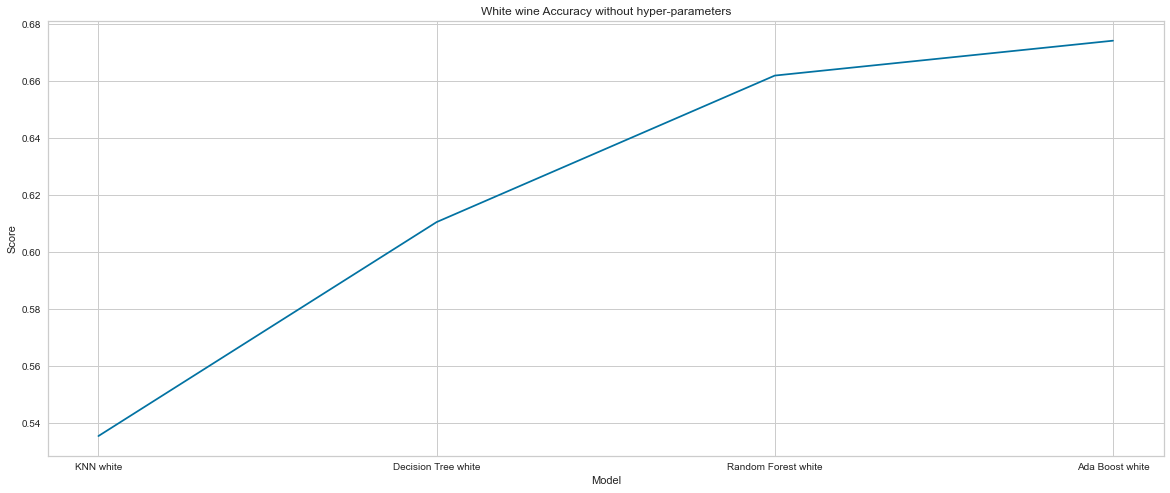

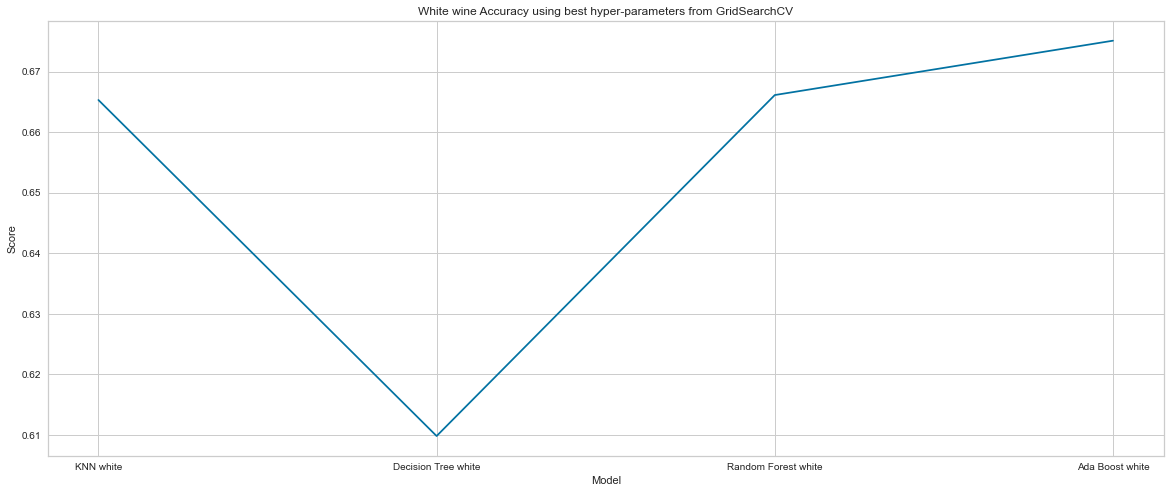

In [49]:
# Accuracy without hyper-parameters
plt.figure(figsize=(20, 8))
plt.title('White wine Accuracy without hyper-parameters')

sns.lineplot(x='Model', y='Score', data=models_pre_white)

# Accuracy using best hyper-parameters from GridSearchCV
plt.figure(figsize=(20, 8))
plt.title('White wine Accuracy using best hyper-parameters from GridSearchCV')
sns.lineplot(x='Model', y='Score', data=models_post_white)
plt.show()

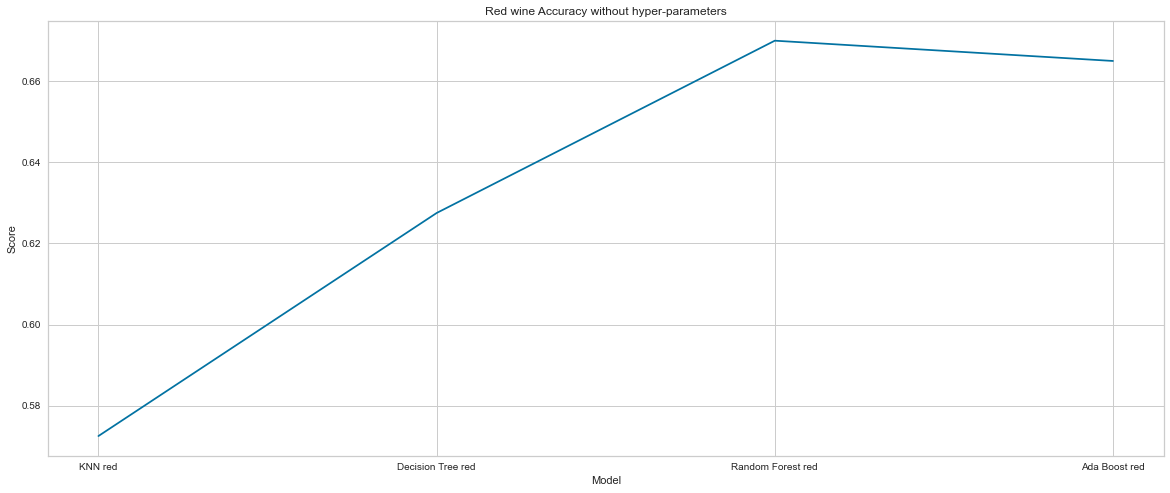

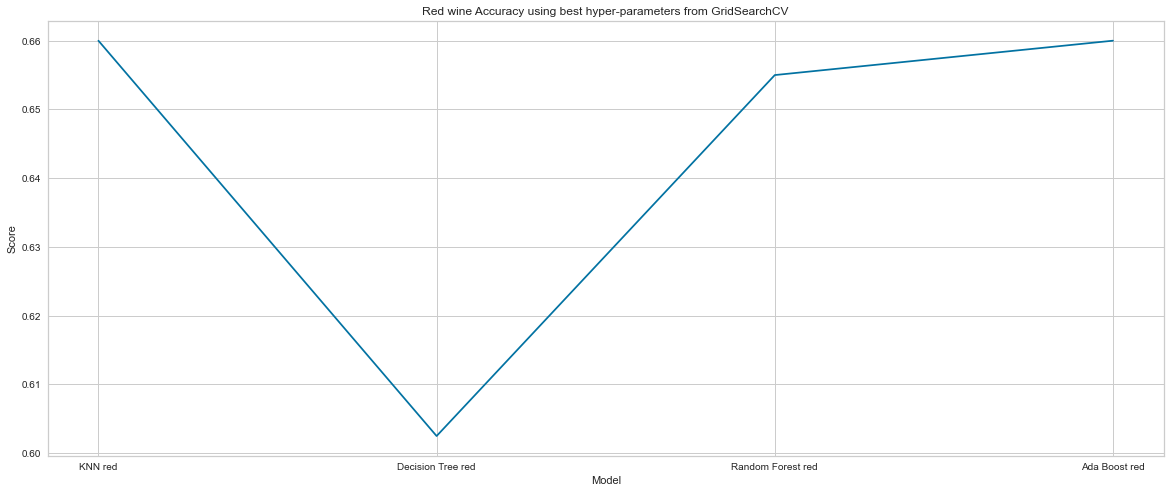

In [50]:
# Accuracy without hyper-parameters
plt.figure(figsize=(20, 8))
plt.title('Red wine Accuracy without hyper-parameters')
sns.lineplot(x='Model', y='Score', data=models_pre_red)

# Accuracy using best hyper-parameters from GridSearchCV
plt.figure(figsize=(20, 8))
plt.title('Red wine Accuracy using best hyper-parameters from GridSearchCV')
sns.lineplot(x='Model', y='Score', data=models_post_red)
plt.show()

The plot shows how the GridSearch parameters are not changing that much for both Tree classifiers which makes sense given how the data in the dataset is really similar to each other. Given that the decision tree classifier probably difficulty splitting into correct nodes. The random forest depends on how well the decision tree performs so while there are some improvements, it's difficult to improve the accuracy given how the dataset is structured

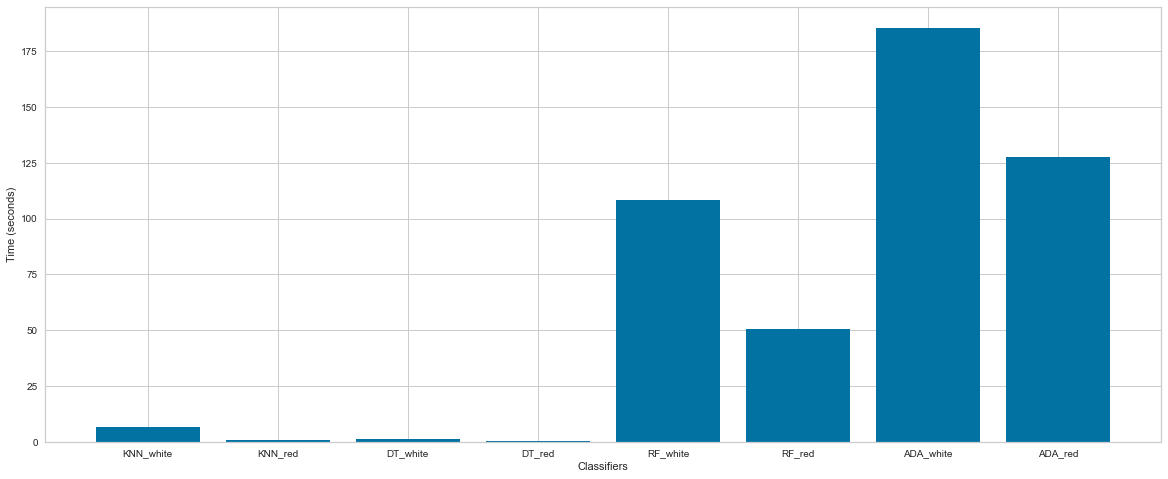

In [51]:
# How long each classifier took
plt.figure(figsize=(20, 8))
plt.bar(range(len(time_dict)), list(time_dict.values()), align='center')
plt.xticks(range(len(time_dict)), list(time_dict.keys()))
plt.ylabel('Time (seconds)')
plt.xlabel('Classifiers')

plt.show()

Based on the accuracy and the time the classifiers take the best course of action would be to use the KNN classifier for both datasets as it has one of, if not the best accuracy score and is takes vastly less time than the other comparable classifiers such as Random Forest or AdaBoost

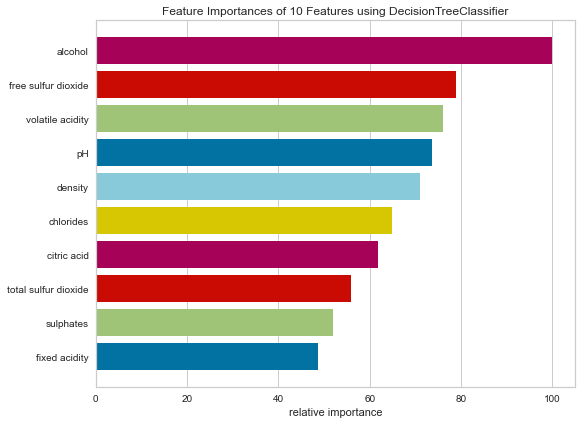

<Figure size 432x288 with 0 Axes>

In [52]:
fig = plt.figure(figsize=(15,6))

ax2 = plt.subplot(122)
viz2 = FeatureImportances(dt2_white)
viz2.fit(X_wines, y_wines)
viz2.show()

plt.tight_layout()

Showing the feature importance that both Decision Tree and Random Forest used to calculate the nodes
This can give us a clearer picture with what went wrong and gave us the accuracy score for both classifiers

Using the elbow curve to find the most optimal number of clusters for KMeans

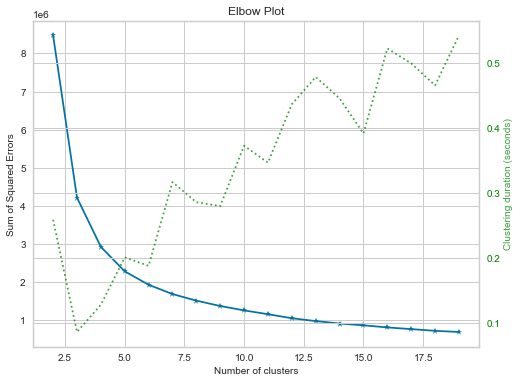

In [53]:
from sklearn.cluster import KMeans
skplt.cluster.plot_elbow_curve(KMeans(random_state=1),
                               X_wines,
                               cluster_ranges=range(2, 20),
                               figsize=(8,6));

Using the number of clusters that the elbow method gave us to create KMeans clusters and plotting them

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


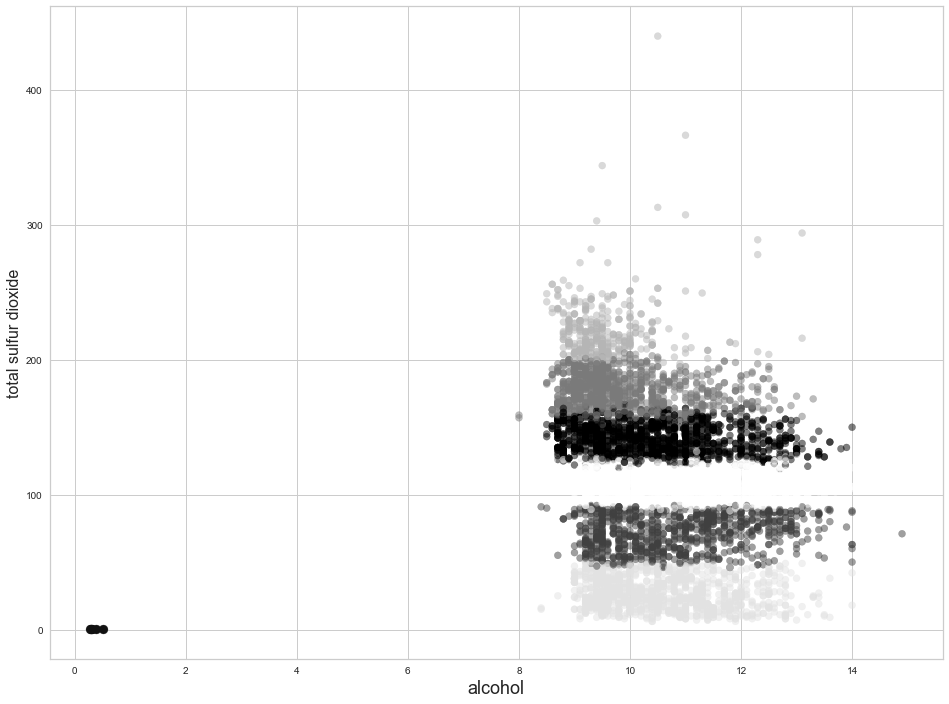

In [54]:
#Getting unique labels
X = X_wines.values[:, 1:]
Clus_dataset = StandardScaler().fit_transform(X)

#Initialize the class object
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
labels = kmeans.labels_

X_wines['Clus_km'] = labels

centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)

#plotting the results:
col = ['green', 'purple', 'red', 'yellow', 'blue', 'white']
#create 2 dimensional graph
f3, ax = plt.subplots(figsize=(16, 12))
plt.scatter(X[:, 8], X[:, 4], c=labels.astype(np.float), alpha=.5)
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

There exist a cluster that starts at the 200 line

This shows that while there is a way to create clusters for the combined dataset the points, as previously stated are really meshed together and there is no real distribution between them.

Testing to see if Regression is a better case for this type of data

In [7]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.25935657496352615

This shows that while the dataset is structured that is better for Linear Regression the fact is that how the distribution of the data points makes it more difficult for the Linear Regression to glean anything of note

Plotting two types of regression models to see if how it classifies the data and seperates it

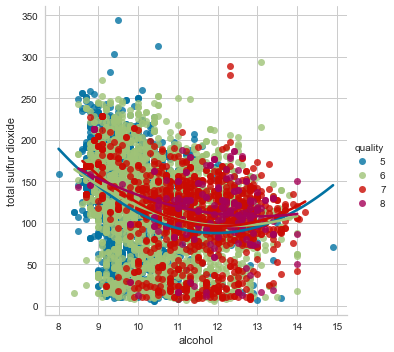

In [8]:
topquality = [6,5,7,8]

q = reg_wines[reg_wines['quality'].isin(topquality)]
sns.lmplot(x='alcohol', y='total sulfur dioxide', data=q, hue='quality', order=2, ci=False)

A linear regression model using the four most common quality values to see what the plot would showcase. This also shows why the linear regression model struggles to find anything that can separate the datapoints into the quality groups

<AxesSubplot:xlabel='alcohol', ylabel='total sulfur dioxide'>

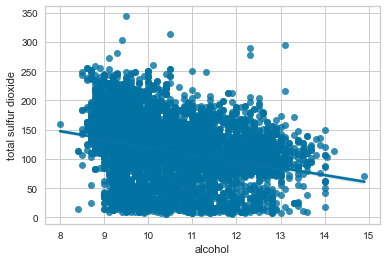

In [9]:
sns.regplot(x='alcohol', y='total sulfur dioxide', data=q)

These plots show also just how close the points are and how even for regression models it is difficult to classify and separate the data points

Due to how "one note" the dataset it, what makes a good wine is inconclusive, all of them are just too similar, There would need to be a more diverse dataset to be able to come to a definite conclusion.

The question that was asked before writing the code was: what makes a good wine good? And sadly I was unable to get an answer to that question as the datasets I used were not big enough and were too one-sided. A good idea to fix those problems that came about would be to find the same dataset with just more data or with some algorithm "artificially" make the datasets bigger to see. Then I would also just make sure that the data does not become disproportionate.